In [16]:
from h5imagegenerator import HDF5ImageGenerator

from albumentations import (
    Compose, ShiftScaleRotate
)

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
train_gen = HDF5ImageGenerator(
    src= './train.h5',
    scaler=True,
    labels_encoding=False,
    batch_size=16)

val_gen = HDF5ImageGenerator(
    src= './val.h5',
    scaler=True,
    labels_encoding=False,
    batch_size=32)

In [32]:
# next batch
images, labels = train_gen[0]

In [40]:
# tensors shapes
'Images:', images.shape, 'Labels:', labels.shape

('Images:', (16, 300, 300, 3), 'Labels:', (16,))

In [38]:
def show_images(images, cols=4, titles=None):
    assert((titles is None) or (len(images) == len(titles)))
    
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

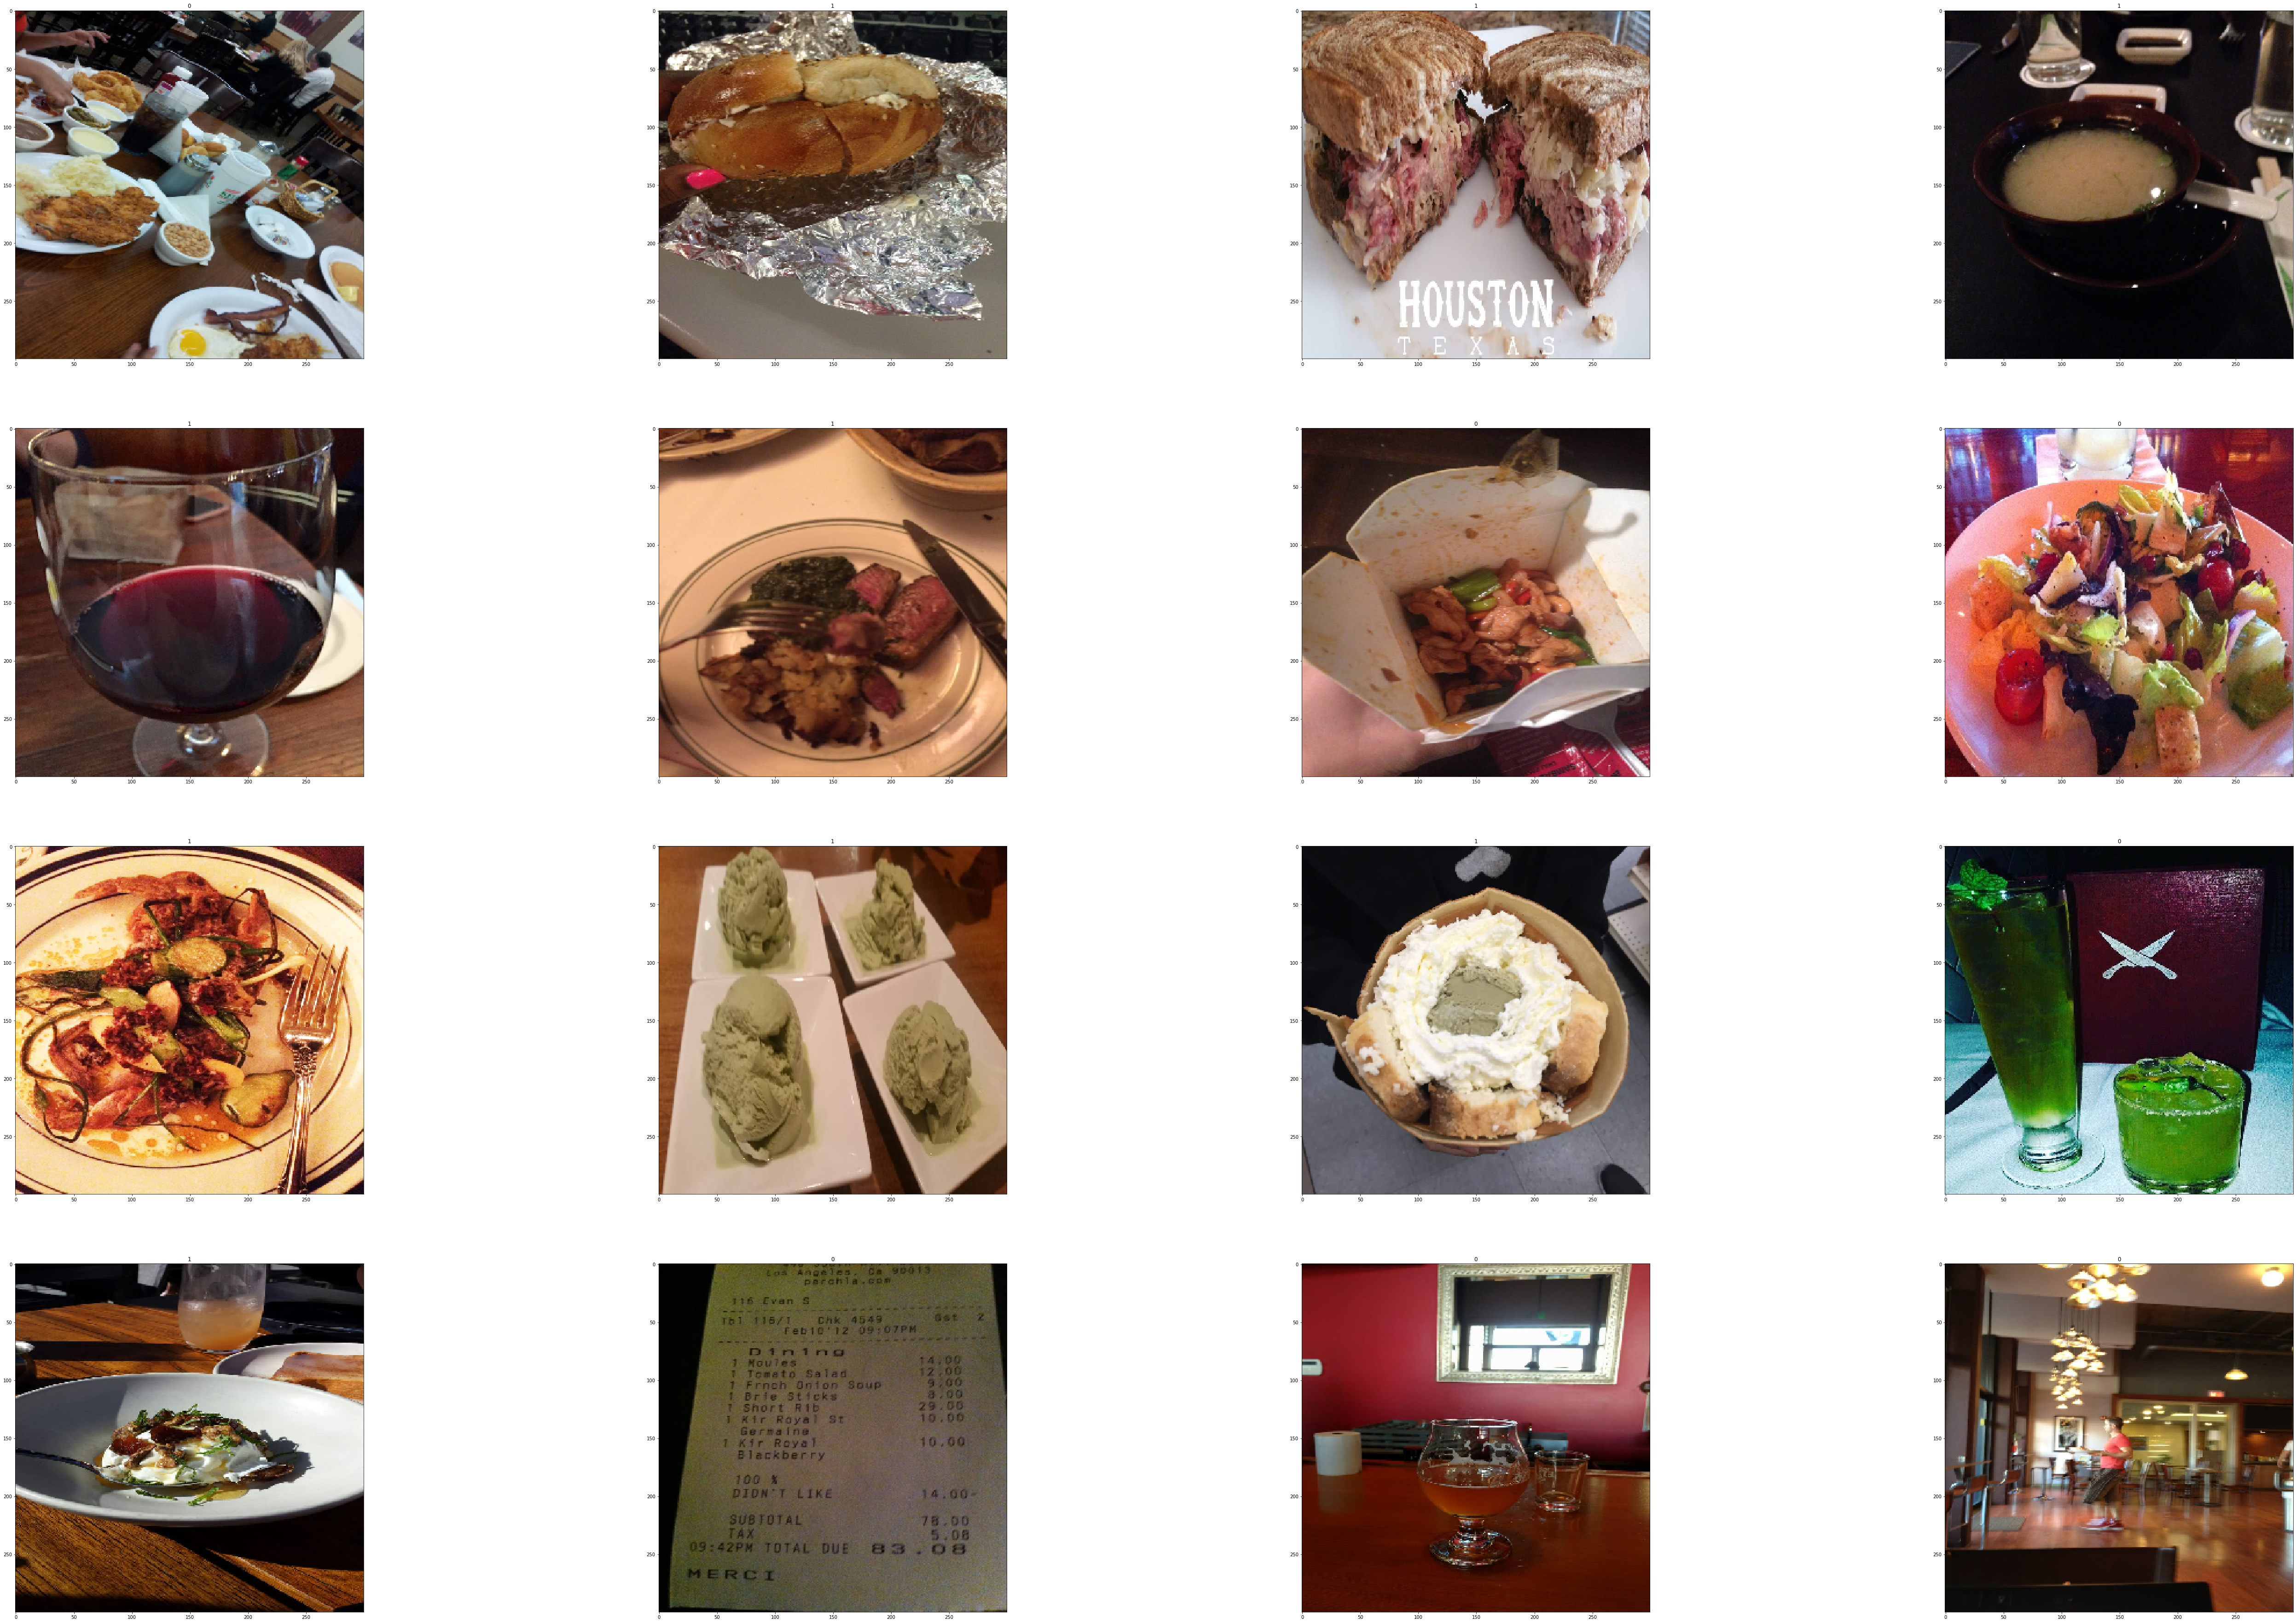

In [39]:
show_images(images, titles=labels)